/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


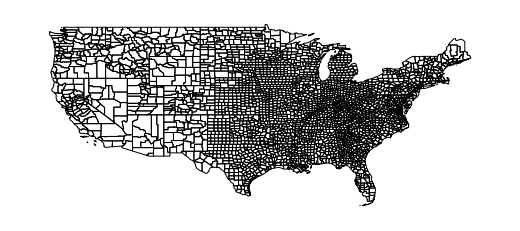

In [ ]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


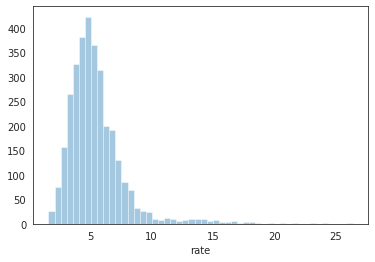

In [ ]:
# library
import pandas as pd
import seaborn as sns

# Read file
data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/unemployment-x.csv')

# Show the distribution of unemployment rate
sns.distplot( data["rate"], hist=True, kde=False, rug=False );

In [ ]:
fullData = geoData.merge(data, left_on=['id'], right_on=['id'])
fullData.head(5)

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,state,county,rate
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",Alabama,Autauga County,5.1
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",Alabama,Blount County,5.1
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",Alabama,Chambers County,5.0
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",Alabama,Chilton County,5.2
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",Alabama,Colbert County,6.5


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


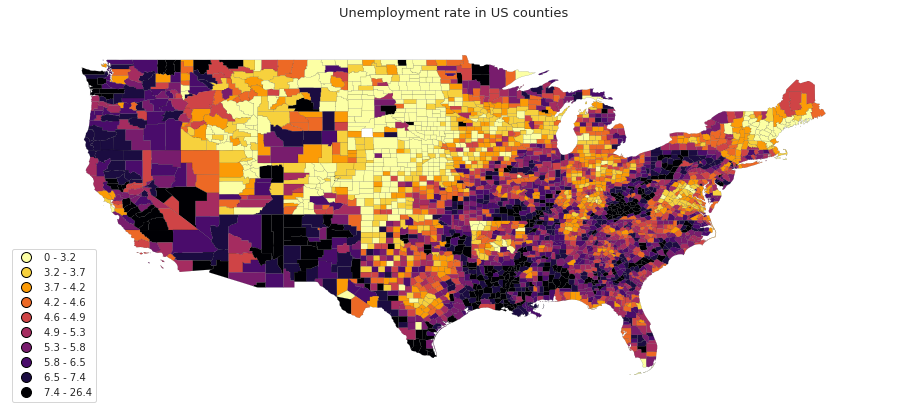

In [ ]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['rate'], k=10)

# Map
gplt.choropleth(fullData, 
    hue="rate", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Unemployment rate in US counties', fontsize=13);